# Complete workflow to get info from GIS tools for hydrological modelling

Here we use birdy's WPS client to perform a catchment delineation, use the delineation to extract physical properties and prepare data for hydrological modelling, all using the Raven server.

In [9]:
from birdy import WPSClient

from example_data import TESTDATA
import datetime as dt
from urllib.request import urlretrieve
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

url = "http://localhost:9099/wps"
wps = WPSClient(url)

In [71]:
# The parameters to define the outlet coordinates. 
# MANIC: lonlat_coordinate="(-68.724444, 50.646667)"
lonlat_coordinate="(-75.724444, 44.646667)"
level="12"
lakes=False
collect_upstream=False

# Let's call the model
resp = wps.shape_selection(lonlat_coordinate=lonlat_coordinate,level=level,lakes=lakes, collect_upstream=collect_upstream)


In [73]:
# Get JSON Polygons of the delineated catchment
[geojson_file,upstream_basins]=resp.get(asobj=False)
dir(geojson_file)
print(geojson_file)

http://localhost:9099/outputs/bf8f09fe-5031-11e9-a59a-b8ca3a8f5177/input.json


Now that we have delineated a catchment, lets find the zonal statistics and other properties of the catchment.

### Here I have to copy the file in the link returned just above from print(geojson_file) because I can't seem to get the actual json_file. Option "asobj=True" fails.


In [76]:
import geojson

with open("/tmp/tmp8yh_8sx2.json") as json_file:
    json_data = geojson.load(json_file)

poly = json_data['geometry']
print(poly)

{"coordinates": [[[-75.80050734964804, 44.487062560222626], [-75.79938235812715, 44.50463595920141], [-75.80361005995006, 44.51042310926652], [-75.79645097520614, 44.51867302788631], [-75.79503919813365, 44.528372531467035], [-75.78533986409502, 44.52978413899742], [-75.77610643174911, 44.53779669867624], [-75.77438235812714, 44.54382697211374], [-75.76728430853947, 44.55200636121964], [-75.76604902479382, 44.55632697211374], [-75.75895097520613, 44.56450636121964], [-75.75771569146048, 44.56882697211374], [-75.74228430853947, 44.58533969455298], [-75.74104902479381, 44.58966030544707], [-75.7381176418728, 44.59367302788631], [-75.73688235812715, 44.59799363878041], [-75.7338948567708, 44.602083333333354], [-75.73688235812715, 44.60617302788631], [-75.7381176418728, 44.610493638780405], [-75.74104902479381, 44.61450636121964], [-75.74228430853947, 44.61882697211374], [-75.74938235812715, 44.62700636121964], [-75.75061764187281, 44.6354936387804], [-75.75354902479381, 44.639506361219645

## Here I try to plot the GeoJSON File. Manic does not work, it returns the lake only, not the catchment.

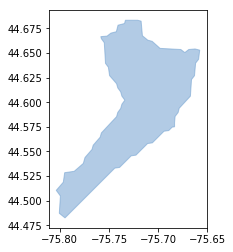

In [77]:
from descartes import PolygonPatch
import matplotlib.pyplot as plt 

BLUE = '#6699cc'
fig = plt.figure() 
ax = fig.gca() 
ax.add_patch(PolygonPatch(poly, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2 ))
ax.axis('scaled')
plt.show()


In [89]:
#############
# NEED TO PASS THE EXTRACTED JSON AUTOMATICALLY
#############
shape = TESTDATA['watershed_vector'] # HERE, instead of this default

crs=4326
projected_crs=32198

resp=wps.shape_properties(shape=str(shape))

[properties]=resp.get(asobj=True)

In [90]:
print(properties)

[{'id': '0', 'SUPERFICIE': 2489.88211, 'NOM': 'Rivière aux Rats', 'ARRONDIE': 2490.0, 'area': 44877188052.9685, 'centroid': [-72.69128332186322, 49.50119363123194], 'perimeter': 1861151.6997088182, 'gravelius': 2.4783578987646804}]


# Properties seem off: SUPERFICIE does not seem to coincide with "area". Which is right?

## Now, Let's extract Zonal Stats. Again, can't use the asobj=true, so we use False and then I am stuck with the  problem that the results are behind a link I can't seem to access.

In [95]:
select_all_touching = True
return_geojson=False
categorical=False
band=1
shape=TESTDATA['watershed_vector']
raster=TESTDATA['earthenv_dem_90m']

resp=wps.zonal_stats(select_all_touching=select_all_touching,return_geojson=return_geojson,categorical=categorical, band=band, raster=str(raster), shape=str(shape))

statistics=resp.get(asobj=False)

In [99]:
print(statistics[0])

http://localhost:9099/outputs/8e6efd40-5034-11e9-9c84-b8ca3a8f5177/input.json


# NEED TO ADD LAND COVER AND SLOPE EXTRACTIONS, BUT THIS IS A GOOD START!